In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl

In [2]:
# Load dataset
df = pd.read_csv("data_v6.csv")
startdates = pd.to_datetime(df["StartDate"], format='%Y-%m-%d')

In [3]:
# Create dataset with outliers for both Registered Capital and Number of Employees removed (95% quantile)
df_rem = df.copy()
df_rem = df[(df["NumEmployees"] < df["NumEmployees"].quantile(0.95)) & (df["RegisteredCapital"] < df["RegisteredCapital"].quantile(0.95))]

In [4]:
# How many outliers removed
outliers = len(df) - len(df_rem)
print("Removed rows: ", outliers)

Removed rows:  201


In [5]:
df.keys()

Index(['Name', 'CVR', 'BusinessAddress', 'StartDate', 'Status', 'IndustryCode',
       'IndustryName', 'Area', 'AreaCode', 'NumEmployees', 'DirectorName',
       'DirectorAddress', 'DirectorId', 'RegisteredCapital',
       'RegisteredCapitalCurrency', 'NumPeople', 'NumCars',
       'DistanceToBusinessMeters', 'DistanceToBusinessDriveSeconds',
       'DirectorAddressLatitude', 'DirectorAddressLongitude ',
       'BusinessAddressLatitude', 'BusinessAddressLongitude', 'StartYear',
       'StartDecade', 'IndustryShortCode', 'IndustryGroup'],
      dtype='object')

In [6]:
# COLOR PALETTE HEX CODES
# Print viridis color palette as hex codes (10 colors)
viridis = mpl.cm.get_cmap('viridis', 10)
print("Viridis color palette:")
for i in range(viridis.N):
    rgb = viridis(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(mpl.colors.rgb2hex(rgb))

Viridis color palette:
#440154
#482878
#3e4989
#31688e
#26828e
#1f9e89
#35b779
#6ece58
#b5de2b
#fde725


C:\Users\simon\AppData\Local\Temp\ipykernel_6988\2138557060.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = mpl.cm.get_cmap('viridis', 10)


# Hexagon Plots

In [7]:
# Create df_norm compy from df
df_norm = df_rem.copy()

# Create a column with the sum of the number of people and number of cars close to director address (called "NumPeopleCars") and z-score it
df_norm["NumPeopleCars"] = (df["NumPeople"] + df["NumCars"] - df["NumPeople"].mean() - df["NumCars"].mean()) / (df["NumPeople"].std() + df["NumCars"].std())

# Z-score NumPeople, NumCars, NumEmployees, and RegisteredCapital
df_norm["NumPeople"] = (df["NumPeople"] - df["NumPeople"].mean()) / df["NumPeople"].std()
df_norm["NumCars"] = (df["NumCars"] - df["NumCars"].mean()) / df["NumCars"].std()
df_norm["NumEmployees"] = (df["NumEmployees"] - df["NumEmployees"].mean()) / df["NumEmployees"].std()
df_norm["RegisteredCapital"] = (df["RegisteredCapital"] - df["RegisteredCapital"].mean()) / df["RegisteredCapital"].std()
df_norm["NumPeopleCars"] = (df["NumPeople"] + df["NumCars"] - df["NumPeople"].mean() - df["NumCars"].mean()) / (df["NumPeople"].std() + df["NumCars"].std())


# Remove all rows where z-scored values are > 3 or < -3
df_norm = df_norm[(df_norm.NumPeople < 3) & (df_norm.NumPeople > -3)]
df_norm = df_norm[(df_norm.NumCars < 3) & (df_norm.NumCars > -3)]
df_norm = df_norm[(df_norm.NumEmployees < 3) & (df_norm.NumEmployees > -3)]
df_norm = df_norm[(df_norm.RegisteredCapital < 3) & (df_norm.RegisteredCapital > -3)]
df_norm = df_norm[(df_norm.NumPeopleCars < 3) & (df_norm.NumPeopleCars > -3)]
df_norm = df_norm[(df_norm.NumPeopleCars < 3) & (df_norm.NumPeopleCars > -3)]


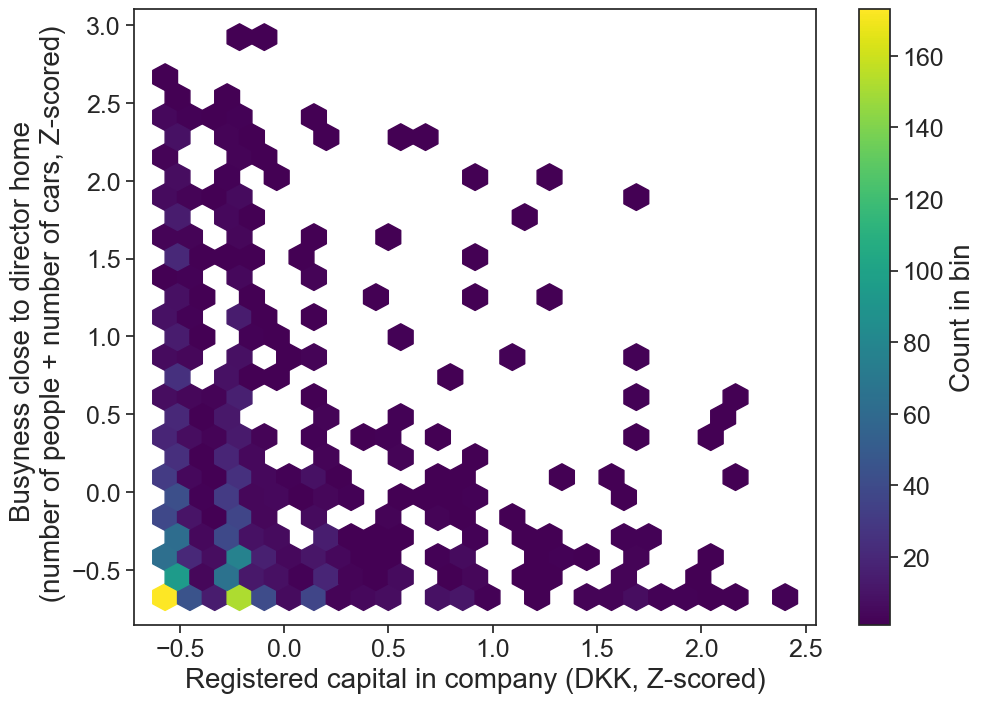

In [64]:
# Set style and figure size
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
sns.set_style("ticks")

# Creating a hexbin plot with Viridis color palette
plt.hexbin(x=df_norm["RegisteredCapital"], y=df_norm["NumPeopleCars"], gridsize=25, cmap='viridis', mincnt=1)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Count in bin', fontsize=20)

# Set labels and title
plt.xlabel('Registered capital in company (DKK, Z-scored)', fontsize=20)
plt.ylabel('Busyness close to director home \n (number of people + number of cars, Z-scored)', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

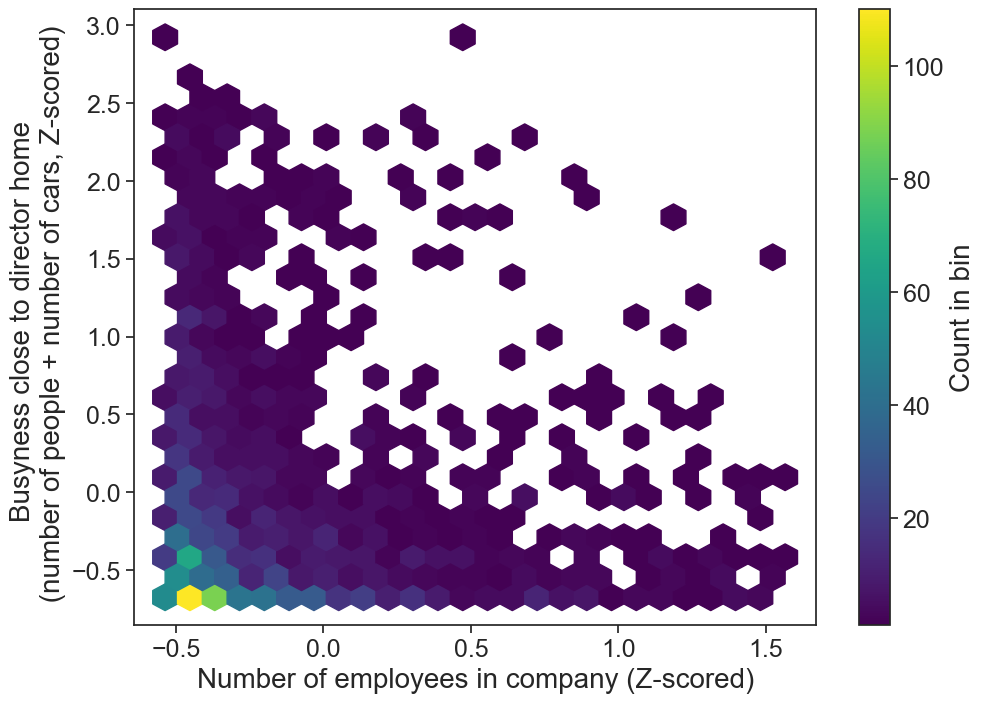

In [65]:
# Set style and figure size
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
sns.set_style("ticks")

# Creating a hexbin plot with Viridis color palette
plt.hexbin(x=df_norm["NumEmployees"], y=df_norm["NumPeopleCars"], gridsize=25, cmap='viridis', mincnt=1)
cbar = plt.colorbar(label='Count in bin')
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Count in bin', fontsize=20)

# Set labels and title
plt.xlabel('Number of employees in company (Z-scored)', fontsize=20)
plt.ylabel('Busyness close to director home \n (number of people + number of cars, Z-scored)', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

# Violin plots

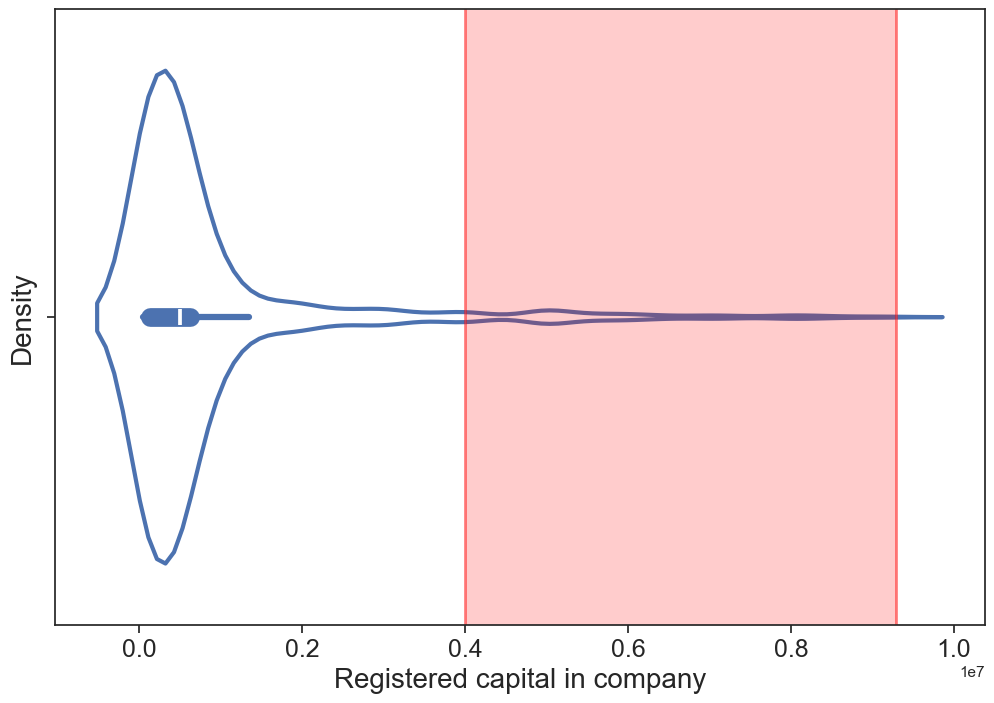

In [60]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_style("ticks")

# Create violin plot without inner points
ax = sns.violinplot(x=df["RegisteredCapital"], linewidth=3, fill=False)

# Overlay scatter plot for points without jitter
# Assuming the data is not categorized, we place all points at x=0 (the center of the violin)
#plt.scatter( df["RegisteredCapital"], [0]*len(df["RegisteredCapital"]), color='blue', alpha=0.2)

ax.grid(False)

# Set axis labels and title
plt.xlabel('Registered capital in company', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

# Color a red box around the outliers
plt.axvspan(df["RegisteredCapital"].quantile(0.95), df["RegisteredCapital"].max(), facecolor='red', alpha=0.2)

# Draw line borders on the red box left, right and top
plt.axvline(df["RegisteredCapital"].quantile(0.95), color='red', linewidth=2, alpha=0.5)
plt.axvline(df["RegisteredCapital"].max(), color='red', linewidth=2, alpha=0.5)

plt.show()

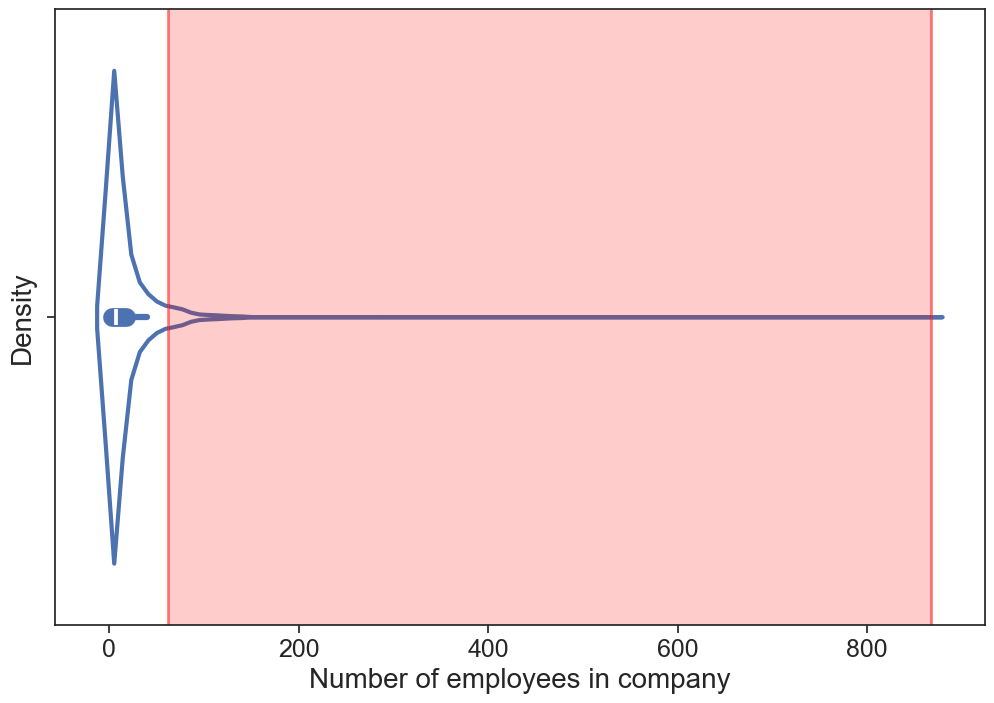

In [61]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_style("ticks")

# Create violin plot without inner points
ax = sns.violinplot(x=df["NumEmployees"], linewidth=3, fill=False)

# Overlay scatter plot for points without jitter
# Assuming the data is not categorized, we place all points at x=0 (the center of the violin)
#plt.scatter( df["RegisteredCapital"], [0]*len(df["RegisteredCapital"]), color='blue', alpha=0.2)

ax.grid(False)

# Set axis labels and title
plt.xlabel('Number of employees in company', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

# Color a red box around the outliers
plt.axvspan(df["NumEmployees"].quantile(0.95), df["NumEmployees"].max(), facecolor='red', alpha=0.2)

# Draw line borders on the red box
plt.axvline(df["NumEmployees"].quantile(0.95), color='red', linewidth=2, alpha=0.5)
plt.axvline(df["NumEmployees"].max(), color='red', linewidth=2, alpha=0.5)

plt.show()

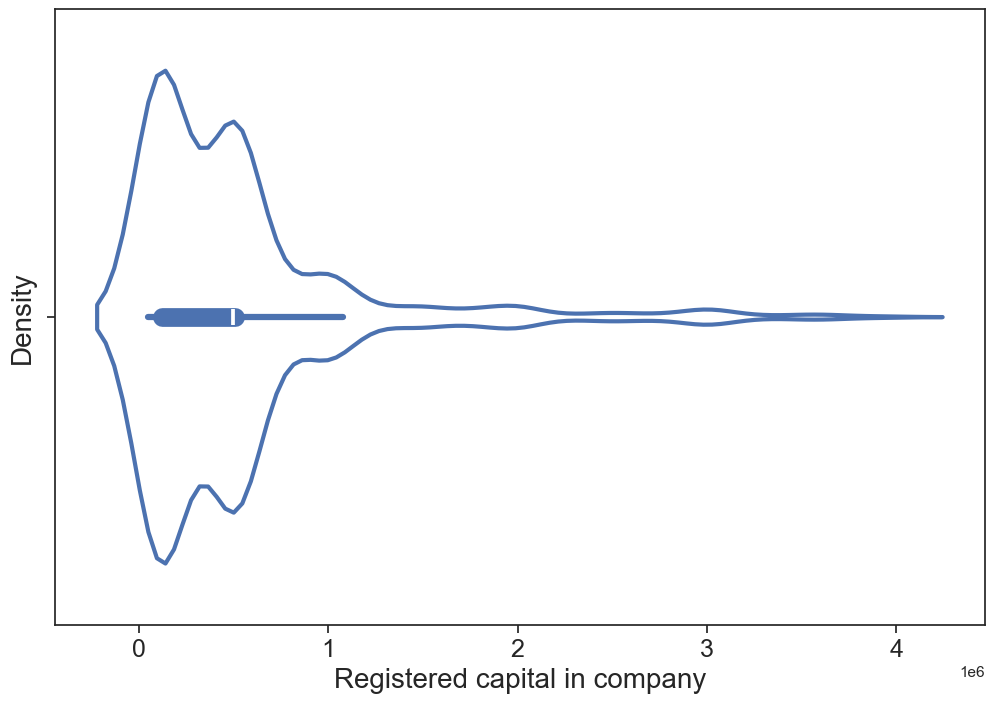

In [62]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_style("ticks")

# Create violin plot without inner points
ax = sns.violinplot(x=df_rem["RegisteredCapital"], linewidth=3, fill=False)

# Overlay scatter plot for points without jitter
# Assuming the data is not categorized, we place all points at x=0 (the center of the violin)
#plt.scatter( df["RegisteredCapital"], [0]*len(df["RegisteredCapital"]), color='blue', alpha=0.2)

ax.grid(False)

# Set axis labels and title
plt.xlabel('Registered capital in company', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()

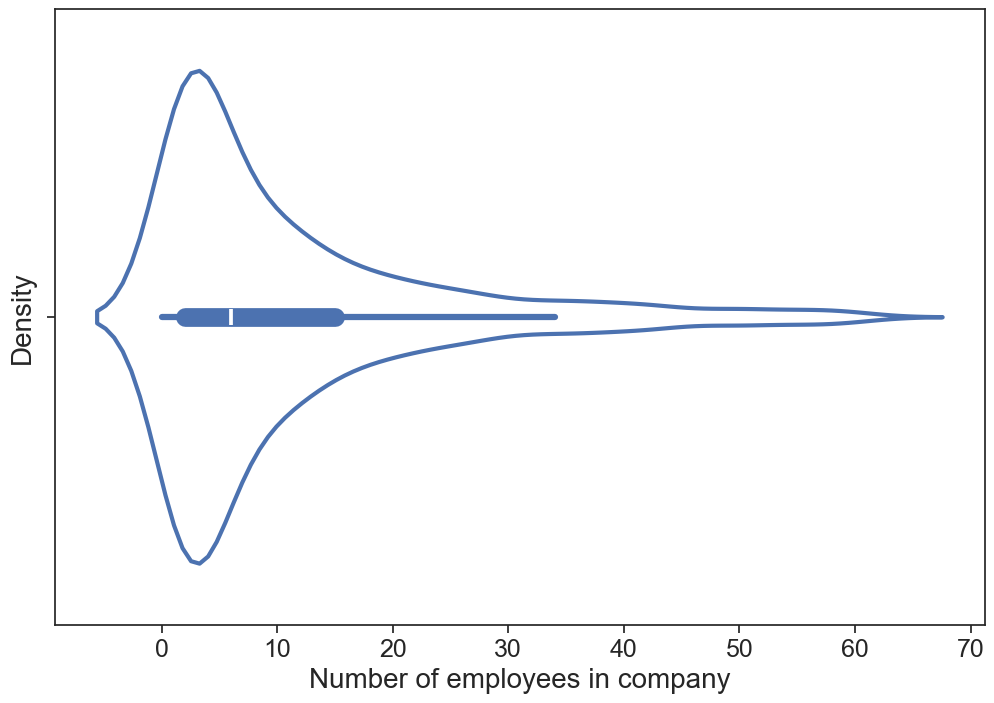

In [63]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_style("ticks")

# Create violin plot without inner points
ax = sns.violinplot(x=df_rem["NumEmployees"], linewidth=3, fill=False)

# Overlay scatter plot for points without jitter
# Assuming the data is not categorized, we place all points at x=0 (the center of the violin)
#plt.scatter( df["RegisteredCapital"], [0]*len(df["RegisteredCapital"]), color='blue', alpha=0.2)

ax.grid(False)

# Set axis labels and title
plt.xlabel('Number of employees in company', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()

# Age plots

In [14]:
# Calculate age of companies
from datetime import date, datetime

df_rem["Age"] = [((date.today()-datetime.strptime(x, '%Y-%m-%d').date()).days)/365.2425 for x in df_rem["StartDate"]]

C:\Users\simon\AppData\Local\Temp\ipykernel_6988\3550746829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rem["Age"] = [((date.today()-datetime.strptime(x, '%Y-%m-%d').date()).days)/365.2425 for x in df_rem["StartDate"]]


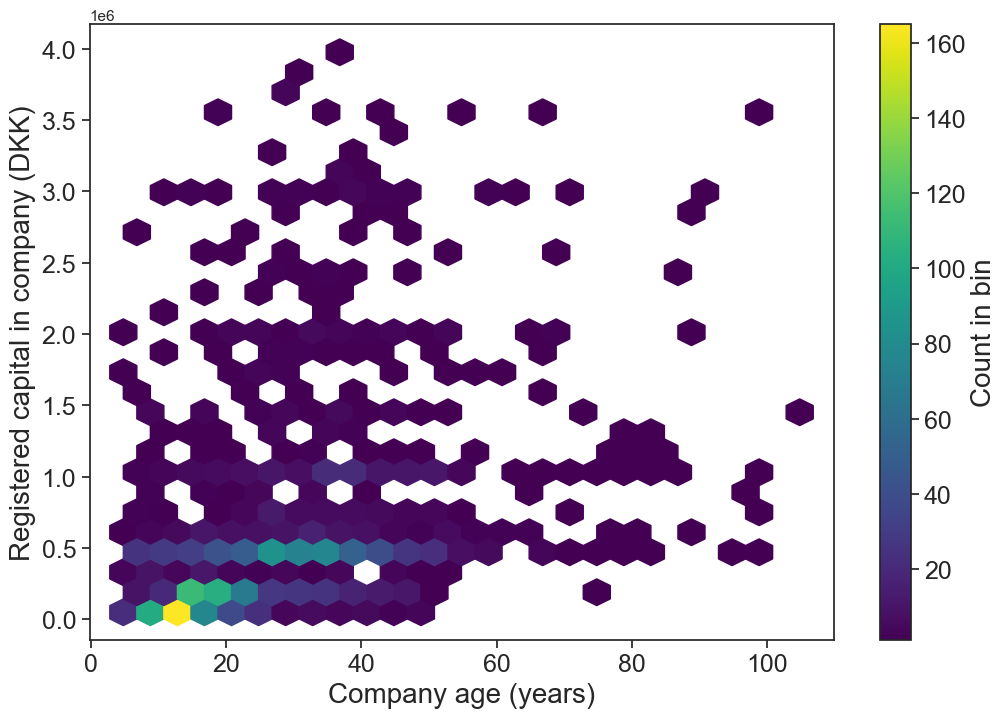

In [33]:
# Show relationship between age and registered capital 
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_style("ticks")

# Create hexbin plot with Viridis color palette
plt.hexbin(x=df_rem["Age"], y=df_rem["RegisteredCapital"], gridsize=25, cmap='viridis', mincnt=1)
cbar = plt.colorbar(label='Count in bin')
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Count in bin', fontsize=20)

# Set axis labels and title
plt.xlabel('Company age (years)', fontsize=20)
plt.ylabel('Registered capital in company (DKK)', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

C:\Users\simon\AppData\Local\Temp\ipykernel_6988\3516407718.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




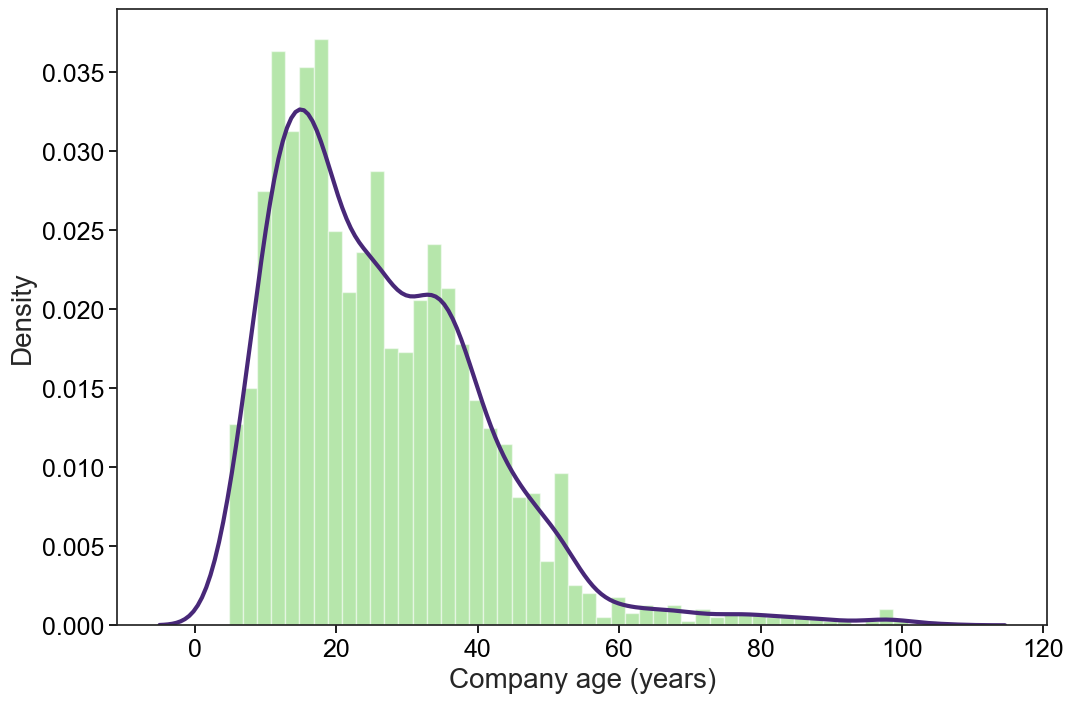

In [32]:
# Plot density distribution of age of companies
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_style("ticks")

# Create histogram plot that uses different color for histogram and kernel density estimate
sns.distplot(df_rem["Age"], bins=50, kde=True, hist_kws={'alpha': 0.5, 'color': '#6ece58'}, kde_kws={'linewidth': 3, 'color': '#482878'})
#sns.histplot(df_rem["Age"], bins=50, kde=True, stat='density', alpha=0.5, line_kws={'linewidth': 3, 'color': '#6ece58'}, kde_kws=dict(cut=3))

# Set axis labels and title
plt.xlabel('Company age (years)', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18, colors='black')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()


# Area plots

C:\Users\simon\AppData\Local\Temp\ipykernel_6988\3133960422.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




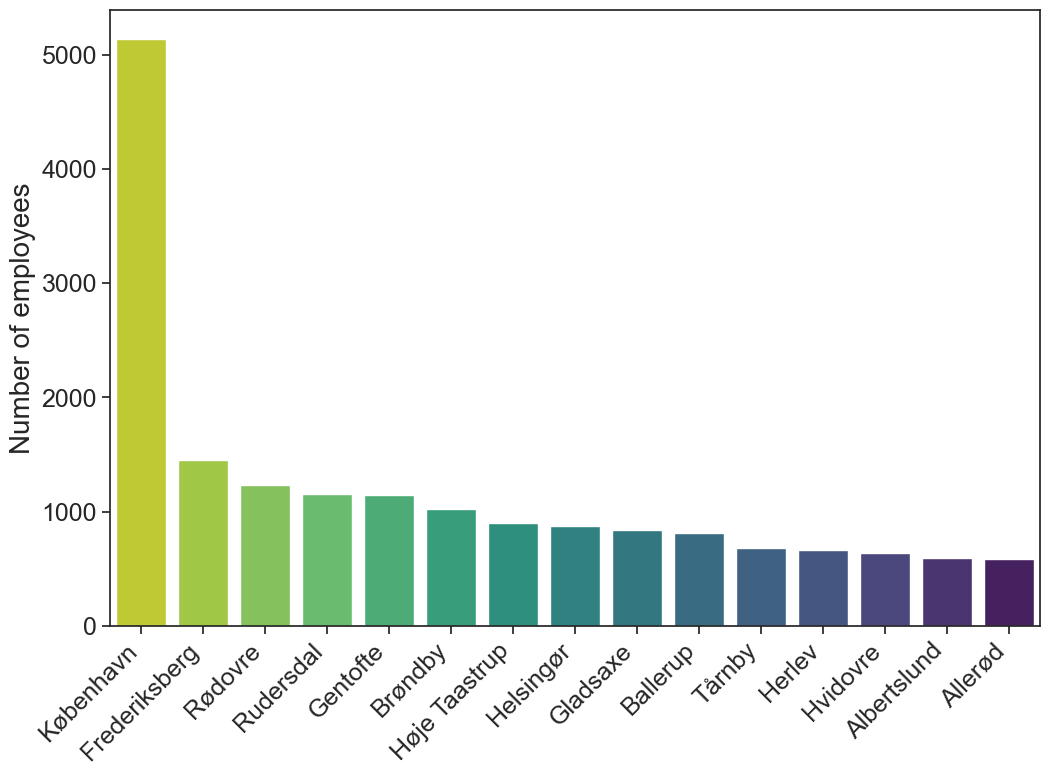

In [34]:
employee_area_df = {
    "Area": [],
    "Employees": []
}

for area in df_rem["Area"].unique():
    employee_area_df["Area"].append(area)
    employee_area_df["Employees"].append(df_rem[df_rem["Area"] == area]["NumEmployees"].sum())

# Plot number of employees per area, limit to top 10
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_style("ticks")

# Create bar plot
ax = sns.barplot(x="Area", y="Employees", data=pd.DataFrame(employee_area_df).sort_values(by="Employees", ascending=False).head(15), palette="viridis_r")

# Set axis labels and title
plt.xlabel('')
plt.ylabel('Number of employees', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

# Remove gridlines
plt.grid(False)

# Rotate x-axis labels and align end of labels with ticks
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Map plots

## Employees in CPH area

In [68]:
import plotly.express as px

# Assuming df_rem is your DataFrame

# Create density_mapbox plot with number of employees per company in Copenhagen area (zoomed in)
fig = px.density_mapbox(df_rem,
                        lat='BusinessAddressLatitude', 
                        lon='BusinessAddressLongitude',
                        z='NumEmployees',
                        labels={"NumEmployees": "Number of employees"},
                        radius=8,
                        center=dict(lat=55.6651, lon=12.5183),
                        zoom=10.2,
                        width=800, height=800,
                        mapbox_style='carto-positron',
                        color_continuous_scale='Viridis')  # Set the colormap to 'Viridis'

# Hide colorbar label  
fig.update_layout(coloraxis_colorbar=dict(
    title='',  # Set title to an empty string to hide it
))

# add your rotated title via annotations
fig.update_layout(
    margin=dict(r=150),
    annotations=[
        dict(
            text="Number of employees in Copenhagen area",
            font_size=20,
            font_color='black',
            textangle=-90,
            showarrow=False,
            xref="paper",
            yref="paper",
            x=1.25,
            y=0.5,
        )
    ]
)

# Increase colorbar tick label size
fig.update_layout(coloraxis_colorbar=dict(
    tickfont=dict(size=18),
))

# Show the plot
fig.show()

## Registered capital

In [58]:
# Create density_mapbox plot with registered capital per company in Copenhagen area (zoomed in)
fig = px.density_mapbox(df_rem,
                        lat='BusinessAddressLatitude', 
                        lon='BusinessAddressLongitude',
                        z='RegisteredCapital',
                        labels={"RegisteredCapital": "Registered capital"},
                        radius=8,
                        center=dict(lat=55.6651, lon=12.5183),
                        zoom=10.2,
                        width=800, height=800,
                        mapbox_style='carto-positron',
                        color_continuous_scale='Viridis')  # Set the colormap to 'Viridis'

# Hide colorbar label
fig.update_layout(coloraxis_colorbar=dict(
    title='',  # Set title to an empty string to hide it
))

# add your rotated title via annotations
fig.update_layout(
    margin=dict(r=150),
    annotations=[
        dict(
            text="Registered capital (DKK) in Copenhagen area",
            font_size=20,
            font_color='black',
            textangle=-90,
            showarrow=False,
            xref="paper",
            yref="paper",
            x=1.25,
            y=0.5,
        )
    ]
)

# Increase colorbar tick label size
fig.update_layout(coloraxis_colorbar=dict(
    tickfont=dict(size=18),
))

# Show the plot
fig.show()

## Age

In [59]:
# Create density_mapbox plot with age per company in Copenhagen area (zoomed in)
fig = px.density_mapbox(df_rem,
                        lat='BusinessAddressLatitude', 
                        lon='BusinessAddressLongitude',
                        z='Age',
                        labels={"Age": "Age"},
                        radius=8,
                        center=dict(lat=55.6651, lon=12.5183),
                        zoom=10.2,
                        width=800, height=800,
                        mapbox_style='carto-positron',
                        color_continuous_scale='Viridis')  # Set the colormap to 'Viridis'

# Hide colorbar label
fig.update_layout(coloraxis_colorbar=dict(
    title='',  # Set title to an empty string to hide it
))

# add your rotated title via annotations
fig.update_layout(
    margin=dict(r=150),
    annotations=[
        dict(
            text="Company age (years) in Copenhagen area",
            font_size=20,
            font_color='black',
            textangle=-90,
            showarrow=False,
            xref="paper",
            yref="paper",
            x=1.25,
            y=0.5,
        )
    ]
)

# Increase colorbar tick label size
fig.update_layout(coloraxis_colorbar=dict(
    tickfont=dict(size=18),
))

# Show the plot
fig.show()

# Clustering

In [21]:
# Calculate clusters of companies in Copenhagen area
df_cluster = df[(df["BusinessAddressLongitude"] > 12) & (df["BusinessAddressLongitude"] < 13) & (df["BusinessAddressLatitude"] > 55.5) & (df["BusinessAddressLatitude"] < 56.2)].copy()
X = np.array([[x[0], x[1]] for x in zip(df_cluster["BusinessAddressLongitude"], df_cluster["BusinessAddressLatitude"])])
kmeans = KMeans(n_clusters=18, random_state=0, n_init="auto").fit(X)

df_cluster["Cluster"] = kmeans.labels_
clusterLabels = []

for l in df_cluster["Cluster"]:
    temp_df = df_cluster[df_cluster["Cluster"] == l][['Area', 'Cluster']]
    label = temp_df.groupby(['Area'])['Cluster'].count().reset_index(name='count').sort_values(['count'], ascending=False).iloc[0]["Area"]
    clusterLabels.append(label)
df_cluster["ClusterLabels"] = clusterLabels

In [22]:
# Generate 18 distinct colors from the ??? colormap
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i/18) for i in range(18)]  # Dividing by 18 to distribute colors evenly


def to_hex(color):
    """Convert color to hex format."""
    return f'#{int(color[0]*255):02x}{int(color[1]*255):02x}{int(color[2]*255):02x}'

color_scale = [to_hex(color) for color in colors]

In [67]:
# Plot the clusters on a scatter_mapbox plot
fig = px.scatter_mapbox(df_cluster, 
                        lat = 'BusinessAddressLatitude', 
                        lon = 'BusinessAddressLongitude',
                        center = dict(lat = 55.6761, lon = 12.5683),
                        zoom = 10,
                        hover_name = 'ClusterLabels',
                        color="ClusterLabels",
                        color_discrete_sequence=color_scale,
                        width=800, height=800,)

# Update the layout
fig.update_layout(
    showlegend = True,
    mapbox_style="carto-positron",
)

# Increase legend font size
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99,
    font=dict(
        size=18,
    )
),
legend_title_text='      Area', 
legend_title_font_size=30, 
legend_title_font_family="Arial", 
legend_title_font_color="black")

# Show the plot
fig.show()